# Lending Club Default Models

In [1]:
#Libraries
import pandas as pd
import os
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#files
dir_name = '/Users/arun/Downloads/LCData/'
file_name = 'Loan_status_2007-2020Q3.gzip'
dir_path = dir_name+file_name

In [3]:
#Read Data

loanData = pd.read_csv(dir_path, low_memory=False, index_col=0)
loanData.head()
loanData.shape

missing_fractions = loanData.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

/Users/arun/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


hardship_loan_status       0.950979
hardship_reason            0.950903
hardship_status            0.950902
hardship_dpd               0.950902
hardship_type              0.950901
hardship_length            0.950901
payment_plan_start_date    0.950901
hardship_end_date          0.950901
hardship_start_date        0.950901
deferral_term              0.950901
dtype: float64

In [4]:
loanData['loan_status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

In [7]:
# Encoding the `loan_status`
# status 1: 'Charged Off', 'Late (16-30 days)', 'Late (31-120 days)', 'Default'
# status 0: 'Fully Paid'
keep_status = ['Charged Off', 'Fully Paid', 'Late (16-30 days)', 'Late (31-120 days)', 'Default']
loanData = loanData[loanData['loan_status'].isin(keep_status)]

loanData['coFlag'] = 1
loanData.loc[loanData['loan_status'] == 'Fully Paid', 'coFlag'] = 0

In [8]:
loanData['loan_status'].value_counts()

Fully Paid            1497783
Charged Off            362548
Late (31-120 days)      16154
Late (16-30 days)        2719
Default                   433
Name: loan_status, dtype: int64

In [9]:
loanData['coFlag'].value_counts()

0    1497783
1     381854
Name: coFlag, dtype: int64

In [10]:
# define categorical and numerical features
cat_features = ['term', 'home_ownership', 'verification_status', 'purpose', 
                'title', 'addr_state', 'initial_list_status', 'application_type', 
                'grade', 'sub_grade']

num_features = ['loan_amnt', 'loan_to_inc', 'int_rate', 'installment_ratio', 'emp_length', 
                'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 
                'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 
                'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
                'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 
                'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
                'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
                'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
                'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
                'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
                'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
                'total_il_high_credit_limit', 'credit_length','coFlag']


/Users/arun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arun/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: ' 10.65%'

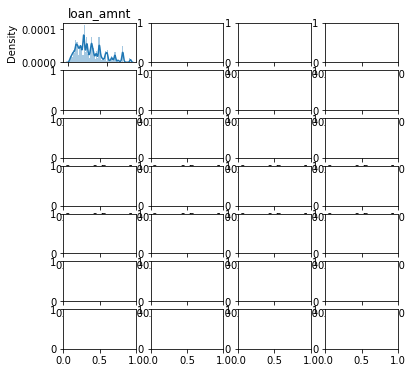

In [12]:
keep_vars = ['loan_amnt','int_rate','emp_length', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq','total_il_high_credit_limit', 'credit_length','coFlag']

colNum =0
fig, axes = plt.subplots(figsize=(6,6), ncols=4, nrows=7)
for row in range(0,7):
    for col in range(0,4):
            if(colNum < len(keep_vars)-1):
                sns.distplot(loanData[keep_vars[colNum]],kde=1, norm_hist=col, ax=axes[row, col])
                axes[row, col].set_title(keep_vars[colNum])
                colNum = colNum+1


In [ ]:

colNum = 0
fig, axes = plt.subplots(figsize=(6, 6), ncols=4, nrows=7)
for row in range(0, 7):
    for col in range(0, 4):
        if (colNum < len(keep_vars)-1):
            axes[row, col].scatter(loanData['coFlag'], loanData[keep_vars[colNum]])
            axes[row, col].set_xlabel(keep_vars[colNum])
            axes[row, col].set_title(keep_vars[colNum])
            colNum = colNum + 1


In [ ]:
#Correlation Matrix
corrMatrix = loanData.corr()
loanData['coFlag']
correl_vars = ['loan_amnt','loan_to_inc','int_rate','emp_length', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq','total_il_high_credit_limit', 'credit_length']

sns.set(style="white")
df = loanData[correl_vars]
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
